<a href="https://colab.research.google.com/github/tomonari-masada/course2021-sml/blob/main/kNN_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kNNの課題の解答例
* leave-one-out法で決めたベストなkの値と、そのkを使って日本の生活満足度の予測したときの誤差を、下に示す。
 * GDP per capitaだけを使って距離を計算: k=10, 誤差 0.91
 * 他の全ての特徴量を使ってユークリッド距離を計算: k=8, 誤差 0.69
 * 他の全ての特徴量を使って、共分散行列を最尤法で求めたマハラノビス距離を計算: k=12, 誤差 0.65
 * 他の全ての特徴量を使って、共分散行列をMCD法で求めたマハラノビス距離を計算: k=11, 誤差 0.61

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

## GDP per capitaだけを使ってLife satisfactionを予測する場合

* `lifesat.csv`をアップロード。

In [2]:
from google.colab import files
files.upload()

Saving lifesat.csv to lifesat (3).csv


{'lifesat.csv': b'Country,GDP per capita,Life satisfaction\nRussia,9054.914,6.0\nTurkey,9437.372,5.6\nHungary,12239.893999999998,4.9\nPoland,12495.333999999999,5.8\nSlovak Republic,15991.736,6.1\nEstonia,17288.083,5.6\nGreece,18064.288,4.8\nPortugal,19121.592,5.1\nSlovenia,20732.482,5.7\nSpain,25864.721,6.5\nKorea,27195.197,5.8\nItaly,29866.581000000002,6.0\nJapan,32485.545,5.9\nIsrael,35343.336,7.4\nNew Zealand,37044.891,7.3\nFrance,37675.006,6.5\nBelgium,40106.632000000005,6.9\nGermany,40996.511,7.0\nFinland,41973.988,7.4\nCanada,43331.960999999996,7.3\nNetherlands,43603.115,7.3\nAustria,43724.030999999995,6.9\nUnited Kingdom,43770.687999999995,6.8\nSweden,49866.265999999996,7.2\nIceland,50854.583,7.5\nAustralia,50961.865,7.3\nIreland,51350.744000000006,7.0\nDenmark,52114.165,7.5\nUnited States,55805.204000000005,7.2\n'}

In [3]:
df_all = pd.read_csv('lifesat.csv', index_col=0)

In [4]:
df = df_all.drop('Japan', 0)
df_test = df_all.loc[['Japan']]

* kNNによる予測の誤差を格納する空のデータフレームを作っておく。

In [5]:
predict_error = pd.DataFrame(index=df.index, columns=range(1, len(df.index)))

* いま作ったデータフレームを予測誤差で埋める

In [6]:
for country in df.index:
  df_train = df.drop(country, 0)
  df_valid = df.loc[[country]]
  diff = (df_train['GDP per capita'] - df_valid['GDP per capita'].item()).abs()
  sorted_countries = diff.sort_values().index
  for k in range(1, len(sorted_countries) + 1):
    predict_lifesat = df_train.loc[sorted_countries[:k]]['Life satisfaction'].mean()
    predict_error.at[country, k] = (predict_lifesat - df_valid['Life satisfaction']).abs().item()

In [7]:
predict_error

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,
Russia,0.4,0.75,0.566667,0.4,0.4,0.533333,0.585714,0.55,0.433333,0.41,0.372727,0.225,0.107692,0.0642857,0,0.0625,0.141176,0.205556,0.263158,0.295,0.319048,0.359091,0.408696,0.445833,0.468,0.507692,0.533333
Turkey,0.4,0.15,0.0333333,0.1,0.08,0.0666667,0.128571,0.1,0.0111111,0.03,0.0636364,0.208333,0.323077,0.364286,0.426667,0.4875,0.564706,0.627778,0.684211,0.715,0.738095,0.777273,0.826087,0.8625,0.884,0.923077,0.948148
Hungary,0.9,0.8,0.9,0.975,0.92,0.75,0.671429,0.6875,0.788889,0.8,0.827273,0.966667,1.07692,1.11429,1.17333,1.23125,1.30588,1.36667,1.42105,1.45,1.47143,1.50909,1.55652,1.59167,1.612,1.65,1.67407
Poland,0.9,0.55,0.3,0.15,0.16,0.3,0.357143,0.325,0.211111,0.19,0.154545,0.00833333,0.107692,0.15,0.213333,0.275,0.352941,0.416667,0.473684,0.505,0.528571,0.568182,0.617391,0.654167,0.676,0.715385,0.740741
Slovak Republic,0.5,0.9,0.933333,0.775,0.86,0.783333,0.742857,0.6625,0.544444,0.52,0.481818,0.333333,0.215385,0.171429,0.106667,0.04375,0.0352941,0.1,0.157895,0.19,0.214286,0.254545,0.304348,0.341667,0.364,0.403846,0.42963
Estonia,0.8,0.15,0.266667,0.175,0.1,0.2,0.171429,0.1,0.0111111,0.03,0.0636364,0.208333,0.323077,0.364286,0.426667,0.4875,0.564706,0.627778,0.684211,0.715,0.738095,0.777273,0.826087,0.8625,0.884,0.923077,0.948148
Greece,0.8,0.55,0.8,0.825,0.86,0.733333,0.871429,0.8625,0.9,0.91,0.936364,1.075,1.18462,1.22143,1.28,1.3375,1.41176,1.47222,1.52632,1.555,1.57619,1.61364,1.66087,1.69583,1.716,1.75385,1.77778
Portugal,0.3,0.15,0.266667,0.45,0.5,0.65,0.528571,0.55,0.544444,0.58,0.609091,0.75,0.861538,0.9,0.96,1.01875,1.09412,1.15556,1.21053,1.24,1.2619,1.3,1.34783,1.38333,1.404,1.44231,1.46667
Slovenia,0.6,0.75,0.533333,0.3,0.08,0.05,0.0285714,0.125,0.0777778,0.08,0.0454545,0.1,0.215385,0.257143,0.32,0.38125,0.458824,0.522222,0.578947,0.61,0.633333,0.672727,0.721739,0.758333,0.78,0.819231,0.844444


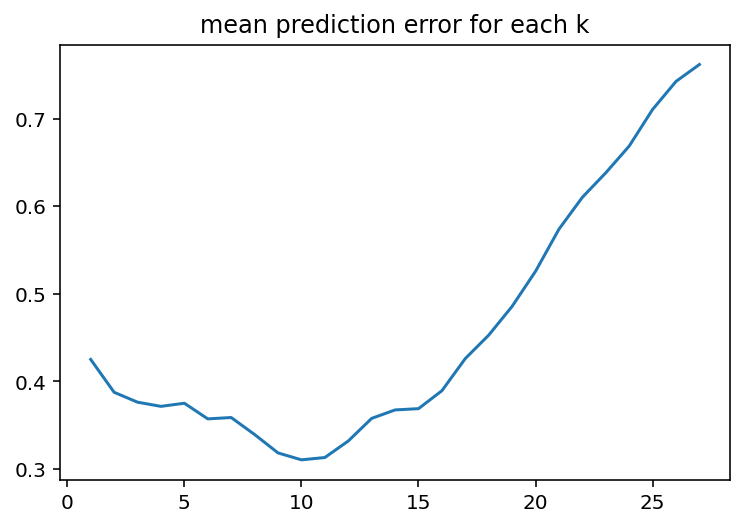

In [8]:
plt.title('mean prediction error for each k')
plt.plot(predict_error.mean(axis=0))

In [9]:
best_k = predict_error.mean(0).idxmin()
top_countries = (df['GDP per capita'] - df_test['GDP per capita'].item()).abs().sort_values()[:best_k].index
predict_lifesat = df.loc[top_countries]['Life satisfaction'].mean()
ground_truth = df_test['Life satisfaction'].item()
print(f"best k: {best_k}")
print(f"ground truth: {ground_truth:.2f}")
print(f"prediction: {predict_lifesat:.2f}")
print(f"error: {abs(predict_lifesat - ground_truth):.2f}")

best k: 10
ground truth: 5.90
prediction: 6.81
error: 0.91


## 他の特徴量をすべて使ってLife satisfactionを予測する場合

* `lifesat_extended.csv`をアップロード。

In [10]:
from google.colab import files
files.upload()

Saving lifesat_extended.csv to lifesat_extended (3).csv


{'lifesat_extended.csv': b'Country,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,Job security,Life expectancy,Life satisfaction,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,GDP per capita\nRussia,15.0,3.8,2.5,15.1,94.0,0.16,69.0,12.8,19292.0,3412.0,11.0,4.0,70.2,6.0,1.7,20885.0,90.0,0.9,37.0,481.0,14.97,65.0,56.0,16.0,9054.914\nTurkey,35.0,5.0,5.5,12.7,34.0,40.86,50.0,1.2,14095.0,3251.0,21.0,8.1,74.6,5.6,2.37,16919.0,86.0,1.1,68.0,462.0,13.42,88.0,62.0,16.4,9437.372\nHungary,15.0,3.6,7.9,4.8,82.0,3.19,58.0,1.3,15442.0,13277.0,20.0,5.7,75.2,4.9,5.1,20948.0,87.0,1.1,57.0,487.0,15.04,62.0,77.0,17.6,1223

In [11]:
df_all = pd.read_csv('lifesat_extended.csv', index_col=0)

### ユークリッド距離を使う場合
* 標準化をおこなった後で、ユークリッド距離を使う。

In [12]:
df_X_all = df_all.drop('Life satisfaction', 1)
df_y_all = df_all['Life satisfaction']

In [13]:
df_X = df_X_all.drop('Japan', 0)
df_y = df_y_all.drop('Japan', 0)
df_X_test = df_X_all.loc[['Japan']]
df_y_test = df_y_all.loc[['Japan']]

* 特徴量ごとに平均を引いて標準偏差で割る。
 * 平均と標準偏差を求めるときにテストデータを含ませないよう、注意！

In [14]:
mean = df_X.mean(0)
std = df_X.std(0)
df_X = (df_X - mean) / std
df_X_test = (df_X_test - mean) / std

In [15]:
predict_error = pd.DataFrame(index=df_X.index, columns=range(1, len(df_X.index)))

In [16]:
for country in df_X.index:
  df_X_train = df_X.drop(country, 0)
  df_y_train = df_y.drop(country, 0)
  df_X_valid = df_X.loc[[country]]
  df_y_valid = df_y.loc[[country]]
  dist = ((df_X_train - df_X_valid.iloc[0]) ** 2).sum(1).pow(0.5)
  sorted_countries = dist.sort_values().index
  for k in range(1, len(sorted_countries) + 1):
    predict_lifesat = df_y_train.loc[sorted_countries[:k]].mean()
    predict_error.at[country, k] = abs(predict_lifesat - df_y_valid.item())

In [17]:
predict_error

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,
Russia,0.4,0.75,0.0333333,0,0.04,0.0833333,0.2,0.1125,0.1,0.11,0.0181818,0.0666667,0.0307692,0.1,0.186667,0.225,0.288235,0.322222,0.242105,0.29,0.338095,0.390909,0.426087,0.4625,0.464,0.503846,0.533333
Turkey,1.8,0.55,0.2,0.25,0.04,0.0666667,0.128571,0.125,0.111111,0.12,0.190909,0.283333,0.330769,0.392857,0.48,0.53125,0.582353,0.572222,0.642105,0.695,0.742857,0.772727,0.817391,0.85,0.892,0.923077,0.948148
Hungary,1.2,1,0.9,0.9,0.76,0.816667,0.928571,1.125,0.988889,1.08,1.20909,1.28333,1.33846,1.39286,1.46,1.425,1.47647,1.52778,1.58421,1.585,1.60476,1.64091,1.61739,1.65833,1.688,1.65,1.67407
Poland,0.1,0.5,0.233333,0.225,0.4,0.3,0.4,0.35,0.333333,0.23,0.318182,0.208333,0.307692,0.392857,0.446667,0.5125,0.576471,0.583333,0.589474,0.635,0.671429,0.718182,0.76087,0.775,0.736,0.761538,0.740741
Slovak Republic,1.2,0.8,0.566667,0.5,0.66,0.633333,0.357143,0.225,0.155556,0.24,0.136364,0.0583333,0.0153846,0.1,0.18,0.19375,0.264706,0.311111,0.357895,0.41,0.428571,0.463636,0.495652,0.4625,0.424,0.45,0.42963
Estonia,0.7,0.1,0.0333333,0.2,0.52,0.35,0.5,0.4625,0.455556,0.59,0.663636,0.716667,0.692308,0.735714,0.8,0.85625,0.876471,0.838889,0.894737,0.93,0.966667,0.886364,0.930435,0.9625,0.96,0.984615,0.948148
Greece,1.7,1.45,1.4,1.125,0.92,0.916667,0.928571,1.025,1.2,1.3,1.36364,1.31667,1.37692,1.46429,1.50667,1.56875,1.62353,1.65556,1.71053,1.745,1.7,1.74545,1.77826,1.74583,1.776,1.8,1.77778
Portugal,0.9,0.75,0.433333,0.675,0.48,0.633333,0.685714,0.6625,0.844444,0.95,1.02727,1.08333,1.05385,1.11429,1.18667,1.225,1.28824,1.33889,1.37895,1.43,1.39524,1.44091,1.47391,1.50417,1.464,1.48846,1.46667
Slovenia,0.1,0.35,0.333333,0.55,0.66,0.616667,0.442857,0.55,0.522222,0.6,0.690909,0.766667,0.830769,0.828571,0.766667,0.8125,0.864706,0.766667,0.821053,0.87,0.885714,0.85,0.882609,0.879167,0.904,0.865385,0.844444


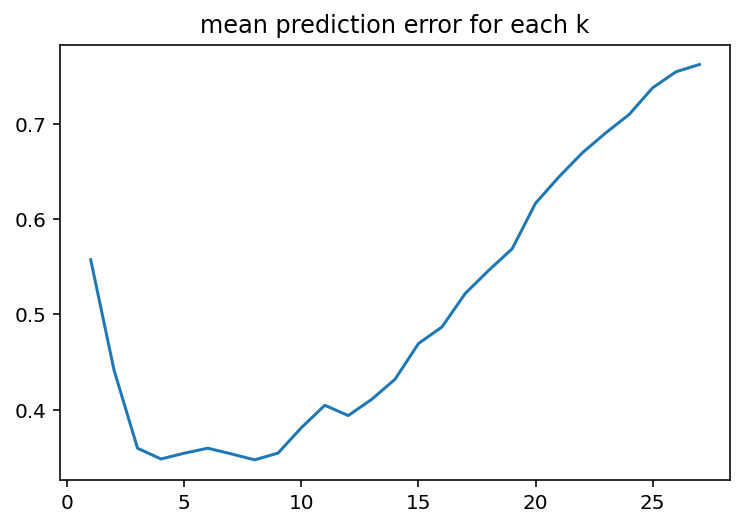

In [18]:
plt.title('mean prediction error for each k')
plt.plot(predict_error.mean(axis=0))

In [19]:
best_k = predict_error.mean(0).idxmin()
dist = ((df_X - df_X_test.iloc[0]) ** 2).sum(1).pow(0.5)
top_countries = dist.abs().sort_values()[:best_k].index
predict_lifesat = df_y.loc[top_countries].mean()
ground_truth = df_y_test.item()
print(f"best k: {best_k}")
print(f"ground truth: {ground_truth:.2f}")
print(f"prediction: {predict_lifesat:.2f}")
print(f"error: {abs(predict_lifesat - ground_truth):.2f}")

best k: 8
ground truth: 5.90
prediction: 6.59
error: 0.69


### 共分散行列を最尤法で求めたマハラノビス距離を使う場合

In [20]:
df_X = df_X_all.drop('Japan', 0)
df_y = df_y_all.drop('Japan', 0)
df_X_test = df_X_all.loc[['Japan']]
df_y_test = df_y_all.loc[['Japan']]

In [21]:
from sklearn.covariance import EmpiricalCovariance
# 最尤法で共分散行列を求める
mle = EmpiricalCovariance()
mle.fit(df_X)

EmpiricalCovariance(assume_centered=False, store_precision=True)

In [22]:
predict_error = pd.DataFrame(index=df_X.index, columns=range(1, len(df_X.index)))

In [23]:
from sklearn.neighbors import DistanceMetric
metric = DistanceMetric.get_metric('mahalanobis', V=mle.covariance_)

In [24]:
for country in df_X.index:
  df_X_train = df_X.drop(country, 0)
  df_y_train = df_y.drop(country, 0)
  df_X_valid = df_X.loc[[country]]
  df_y_valid = df_y.loc[[country]]
  df_X_train['dist'] = metric.pairwise(df_X_train, df_X_valid).reshape(-1)
  sorted_countries = df_X_train['dist'].sort_values().index
  for k in range(1, len(sorted_countries) + 1):
    predict_lifesat = df_y_train.loc[sorted_countries[:k]].mean()
    predict_error.at[country, k] = abs(predict_lifesat - df_y_valid.item())

In [25]:
predict_error

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,
Russia,0.9,0.3,0.166667,0.225,0.12,0.183333,0.157143,0.1125,0.244444,0.27,0.354545,0.333333,0.415385,0.45,0.506667,0.55625,0.582353,0.622222,0.652632,0.61,0.561905,0.6,0.608696,0.533333,0.572,0.515385,0.533333
Turkey,1.3,0.3,0.633333,0.525,0.6,0.5,0.7,0.7625,0.866667,0.96,0.881818,0.95,1.01538,1.00714,0.886667,0.93125,0.847059,0.822222,0.868421,0.92,0.9,0.877273,0.9,0.870833,0.904,0.930769,0.948148
Hungary,1.6,2,2.2,1.875,1.66,1.76667,1.81429,1.675,1.62222,1.57,1.49091,1.56667,1.43846,1.41429,1.38,1.4375,1.47647,1.50556,1.52632,1.46,1.50952,1.55909,1.56087,1.59583,1.628,1.66154,1.67407
Poland,0.3,0.95,0.333333,0.3,0.38,0.5,0.642857,0.5375,0.466667,0.57,0.518182,0.575,0.646154,0.7,0.746667,0.6875,0.711765,0.761111,0.810526,0.83,0.871429,0.9,0.869565,0.804167,0.812,0.742308,0.740741
Slovak Republic,0.4,0.05,0.3,0.575,0.62,0.316667,0.2,0.2625,0.188889,0.29,0.145455,0.233333,0.138462,0.207143,0.28,0.25625,0.323529,0.355556,0.357895,0.335,0.37619,0.418182,0.447826,0.408333,0.428,0.4,0.42963
Estonia,1.3,1.5,1.6,1.425,1.18,1.06667,1.14286,1.15,0.944444,0.77,0.827273,0.791667,0.692308,0.735714,0.806667,0.8625,0.811765,0.777778,0.836842,0.865,0.904762,0.95,0.947826,0.925,0.892,0.923077,0.948148
Greece,0.9,1.5,1.26667,1.25,1.26,1.06667,1.15714,1.3375,1.48889,1.58,1.66364,1.73333,1.79231,1.82143,1.81333,1.85,1.8,1.74444,1.76316,1.725,1.76667,1.8,1.83913,1.85417,1.828,1.83462,1.77778
Portugal,0.6,0.55,0.666667,0.95,0.96,1.2,1,1.05,1.18889,1.21,1.3,1.36667,1.40769,1.46429,1.50667,1.55,1.5,1.44444,1.40526,1.425,1.4619,1.5,1.51739,1.55417,1.528,1.53462,1.46667
Slovenia,1.2,1.45,0.7,0.825,0.98,0.833333,0.871429,0.8625,0.955556,0.9,0.736364,0.625,0.6,0.664286,0.726667,0.79375,0.823529,0.783333,0.826316,0.825,0.847619,0.804545,0.83913,0.816667,0.844,0.880769,0.844444


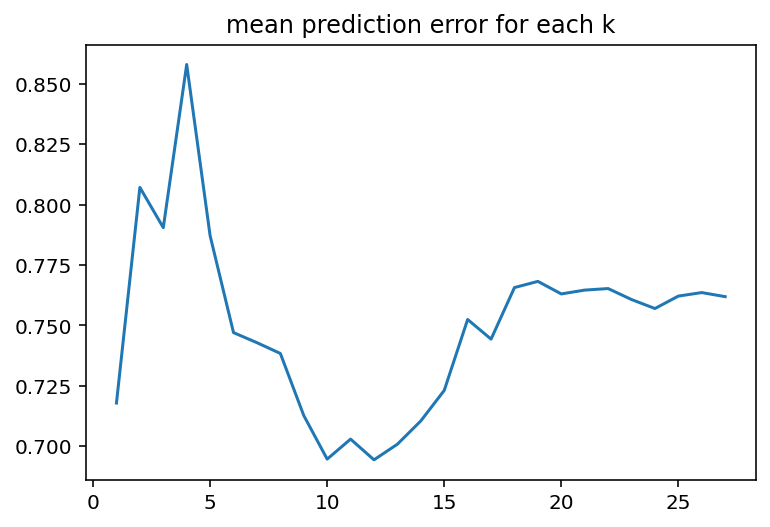

In [26]:
plt.title('mean prediction error for each k')
plt.plot(predict_error.mean(axis=0))

In [27]:
best_k = predict_error.mean(0).idxmin()
df_X['dist'] = metric.pairwise(df_X, df_X_test).reshape(-1)
top_countries = df_X['dist'].abs().sort_values()[:best_k].index
df_X = df_X.drop('dist', 1)
predict_lifesat = df_y.loc[top_countries].mean()
ground_truth = df_y_test.item()
print(f"best k: {best_k}")
print(f"ground truth: {ground_truth:.2f}")
print(f"prediction: {predict_lifesat:.2f}")
print(f"error: {abs(predict_lifesat - ground_truth):.2f}")

best k: 12
ground truth: 5.90
prediction: 6.55
error: 0.65


### 共分散行列をMinimum Covariance Determinant法で求めたマハラノビス距離を使う場合
* minimum covariance determinant法については、下の記事を参考にしてください。
 * https://blog.brainpad.co.jp/entry/2018/02/19/150000

In [28]:
df_X = df_X_all.drop('Japan', 0)
df_y = df_y_all.drop('Japan', 0)
df_X_test = df_X_all.loc[['Japan']]
df_y_test = df_y_all.loc[['Japan']]

In [29]:
from sklearn.covariance import MinCovDet
# Minimum Covariance Determinant法で共分散行列を求める
mcd = MinCovDet(random_state=0)
mcd.fit(df_X)

MinCovDet(assume_centered=False, random_state=0, store_precision=True,
          support_fraction=None)

In [30]:
metric = DistanceMetric.get_metric('mahalanobis', V=mcd.covariance_)

In [31]:
for country in df_X.index:
  df_X_train = df_X.drop(country, 0)
  df_y_train = df_y.drop(country, 0)
  df_X_valid = df_X.loc[[country]]
  df_y_valid = df_y.loc[[country]]
  df_X_train['dist'] = metric.pairwise(df_X_train, df_X_valid).reshape(-1)
  sorted_countries = df_X_train['dist'].sort_values().index
  for k in range(1, len(sorted_countries) + 1):
    predict_lifesat = df_y_train.loc[sorted_countries[:k]].mean()
    predict_error.at[country, k] = abs(predict_lifesat - df_y_valid.item())

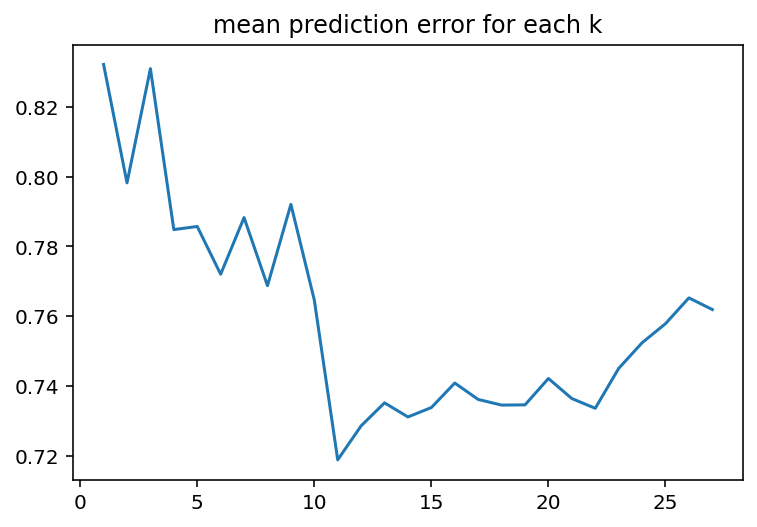

In [32]:
plt.title('mean prediction error for each k')
plt.plot(predict_error.mean(axis=0))

In [33]:
best_k = predict_error.mean(0).idxmin()
df_X['dist'] = metric.pairwise(df_X, df_X_test).reshape(-1)
top_countries = df_X['dist'].abs().sort_values()[:best_k].index
df_X = df_X.drop('dist', 1)
predict_lifesat = df_y.loc[top_countries].mean()
ground_truth = df_y_test.item()
print(f"best k: {best_k}")
print(f"ground truth: {ground_truth:.2f}")
print(f"prediction: {predict_lifesat:.2f}")
print(f"error: {abs(predict_lifesat - ground_truth):.2f}")

best k: 11
ground truth: 5.90
prediction: 6.51
error: 0.61
